# XArray THREDDS Problem Description
This notebook contains a description of a common error find while using the [_.load()_](https://docs.xarray.dev/en/latest/generated/xarray.DataArray.load.html) function in [_xarray_](https://docs.xarray.dev/en/latest/index.html) package while connected in a THREDDS server to load data locally.

In this example, outputs from a global ocean model ([HYCOM](https://www.hycom.org/)) are acessed through a THREDDS server. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cf_xarray
import requests
from bs4 import BeautifulSoup
from collections import Counter
import re

In [6]:
def convert_to_360(lon):
    return float(np.remainder(lon + 360, 360))

In [4]:
###File Location and Domain Definition
url = "https://tds.hycom.org/thredds/dodsC/GLBy0.08/expt_93.0"
ds = xr.open_dataset(url, drop_variables="tau")

### Domain Specification
lonmin=-54
lonmax=-31
latmin=-36
latmax=7
selvar = 'water_u'

da = ds[selvar].sel(lon=slice(convert_to_360(lonmin), convert_to_360(lonmax)), lat=slice(latmin,latmax))

In [6]:
unit = 1e9
print(f'The present dataset is about {np.round(da.size/unit)}GB in size')
print(f'The amount of data present in a single level is about {da.sel(depth=0).size/unit}GB')

The present dataset is about 207.0GB in size
The amount of data present in a single level is about 5.184116352GB


In [14]:
test1 = da.sel(depth=0).load()

oc_open: server error retrieving url: code=? message="Error {
    code = 500;
    message = "java.net.SocketTimeoutException: Read timed out; water_u -- 0:16728,0:0,1100:2175,3825:4112";
}"oc_open: server error retrieving url: code=? message="Error {
    code = 500;
    message = "java.net.SocketTimeoutException: Read timed out; water_u -- 0:16728,0:0,1100:2175,3825:4112";
}"oc_open: server error retrieving url: code=? message="Error {
    code = 500;
    message = "java.net.SocketTimeoutException: Read timed out; water_u -- 0:16728,0:0,1100:2175,3825:4112";
}"oc_open: server error retrieving url: code=? message="Error {
    code = 500;
    message = "java.net.SocketTimeoutException: Read timed out; water_u -- 0:16728,0:0,1100:2175,3825:4112";
}"oc_open: server error retrieving url: code=? message="Error {
    code = 500;
    message = "opendap.dap.DataReadException: Inconsistent array length read: 1165128303 != 1914731274; water_u -- 0:16728,0:0,1100:2175,3825:4112";
}"oc_open: server

RuntimeError: NetCDF: file not found

In [8]:
test2 = da.sel(time=slice("2024-01-01", "2024-01-10"))
print(f'The present dataset is about {np.round(test2.size/unit)}GB in size'

The present dataset is about 1.0GB in size


In [ ]:
test2 = da.sel(time=slice("2024-01-01", "2024-01-10")).load()

oc_open: server error retrieving url: code=? message="Error {
    code = 500;
    message = "java.net.SocketTimeoutException: Read timed out; water_u -- 14821:14900,0:39,1100:2175,3825:4112";
}"oc_open: server error retrieving url: code=? message="Error {
    code = 500;
    message = "java.net.SocketTimeoutException: Read timed out; water_u -- 14821:14900,0:39,1100:2175,3825:4112";
}"oc_open: server error retrieving url: code=? message="Error {
    code = 500;
    message = "java.net.SocketTimeoutException: Read timed out; water_u -- 14821:14900,0:39,1100:2175,3825:4112";
}"oc_open: server error retrieving url: code=? message="Error {
    code = 500;
    message = "java.net.SocketTimeoutException: Read timed out; water_u -- 14821:14900,0:39,1100:2175,3825:4112";
}"

In [7]:
try:
    from wordcloud import WordCloud
    from nltk.corpus import stopwords
    from nltk import pos_tag  # Import pos_tag for POS tagging
    from nltk.tokenize import word_tokenize 
    import nltk
    nltk.download('stopwords')
    nltk.download('punkt')
    nltk.download('averaged_perceptron_tagger')
    nltk.download('averaged_perceptron_tagger_eng')

except:
    %pip install wordcloud
    %pip install nltk
    %pip install selenium
    from wordcloud import WordCloud
    from nltk.corpus import stopwords
    from nltk import pos_tag  # Import pos_tag for POS tagging
    from nltk.tokenize import word_tokenize 
    import nltk
    nltk.download('stopwords')
    nltk.download('punkt')
    nltk.download('averaged_perceptron_tagger')
    nltk.download('averaged_perceptron_tagger_eng') 

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [8]:
def get_words_from_topic(url):
    # Faz a requisição para acessar a página
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Erro ao acessar a página {url}")
        return []

    # Extrai o conteúdo da página
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Encontra todo o texto nos tópicos (ajustar seletor conforme necessário)
    text_content = soup.get_text()
    
    # Remove pontuação e números, e converte para minúsculas
    words = re.findall(r'\b[a-zá-úà-ùãõâêîôûç]+\b', text_content.lower())
    
    return words

def filter_words(words):
    # Get the list of English stopwords and extend with common articles/prepositions
    stop_words = set(stopwords.words('english'))

    # POS tagging
    words_with_pos = pos_tag(words)

    # Filter out stopwords and nouns
    filtered_words = [
        word for word, pos in words_with_pos
        if word not in stop_words and pos not in ['NN', 'NNS', 'NNP', 'NNPS']
    ]
    
    return filtered_words

def main_url_search(urls):
    # Lista de URLs dos tópicos do fórum (adicione mais URLs conforme necessário)
    all_words = []
    # Para cada URL de tópico, extrai as palavras
    for url in urls:
        words = get_words_from_topic(url)
        filtered_words = filter_words(words)
        all_words.extend(filtered_words)
    
    # Contagem das palavras
    word_count = Counter(all_words)

    return word_count

url = 'https://groups.google.com/a/hycom.org/g/forum'
response = requests.get(url)
# Extrai o conteúdo da página
soup = BeautifulSoup(response.text, 'html.parser')

In [9]:
# Define the list of words to color differently
highlight_words = {"runtime":"red","via":"red","opendap":"red","https":"red","read":"red","netcdf":"red","download":"red", "downloading": "red", "thredds": "red","accessing":"red","access":"red"}

# Custom color function
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return highlight_words.get(word, "lightgray")

In [25]:
[print(x) for x in list(dict(word_counters).keys()) if 'net' in x]

netcdfsubset
netcdf


[None, None]

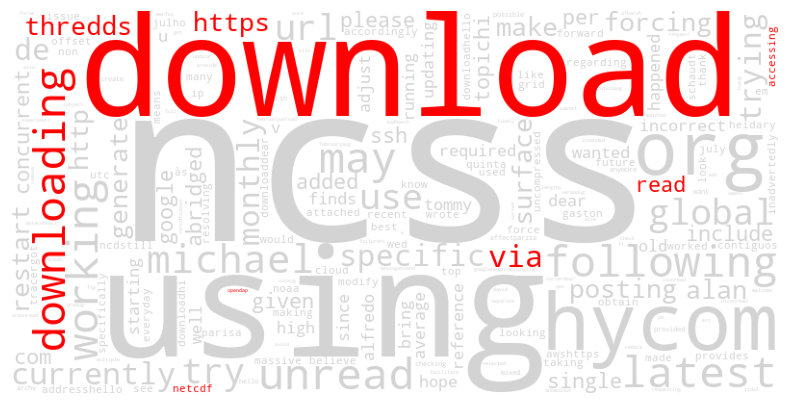

In [10]:
word_counters = main_url_search([url])
wordcloud = WordCloud(width=800, height=400, background_color='white',color_func=color_func).generate_from_frequencies(word_counters)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

The runtime errors are very common while trying to load a dataset as we can see by the above example and also by the print screen below, where the red poligons highlight the errors related with donwloading data in the [HYCOM forum](https://groups.google.com/a/hycom.org/g/forum?pli=1) 

![Minha Imagem](hycom_forum.png)

## OceanHackWeek 2024 Project
Therefore, in order to optimize the access of data trough a THREDDS server, during the [OceanHackWeek 2024](https://github.com/oceanhackweek), we develop a new _xarray accessor_ to facilitate the access to this data without runtime errors. For those who are not familiar with the _xarray accessor_, we reccomend their documentation in their own [website](https://docs.xarray.dev/en/stable/internals/extending-xarray.html)